In [ ]:
from platform import python_version
python_version()

In [1]:
import app
import gcode

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

from ipywidgets import interact, widgets
from IPython.display import display, HTML, FileLink

# %matplotlib widget

# this changes the default date converter for better interactive plotting of dates:
#plt.rcParams['date.converter'] = 'concise'

try:
    text = text_w.value
    style = style_w.value
    bias = bias_w.value
    filename = filename_w.value
except:
#     text="""Keep every line 50 chars or less
# Oh yeah, oh yeah, oh no ooo"""
    style = 5
    bias  = 10
    filename = 'file'
    text = """Lets test out this text at zoom 0.75
Line 2

Line 4
Hello world, I am Creme Brulle,
Lets not beat around the bush and get to the real subject here.
The real calamity, crazy, loco, but not so much, so here you go,
another line goes by and you still have no clue what I am about to
tell you. So Brace Yourself, here it comes, Here It Comes!

Yours Truly
Russel Farm Potatos
General Alkaline Constitutional Conversationalist
Line 14"""

text_w = widgets.Textarea(
    value=text,
    placeholder='Type something',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(height="200px", width="70%")
)
style_w = widgets.IntSlider(
    value=style,
    min=0,
    max=12,
    step=1,
    description='Styles:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
bias_w = widgets.FloatSlider(
    value=bias,
    min=0.1,
    max=10,
    step=0.1,
    description='Biases:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
filename_w = widgets.Text(
    value=filename,
    placeholder='Type something',
    description='Filename:',
    disabled=False
)
#textarea
#style
#widgets.VBox([textarea, style])
display(text_w, style_w, bias_w, filename_w)

Textarea(value='Lets test out this text at zoom 0.75\nLine 2\n\nLine 4\nHello world, I am Creme Brulle,\nLets …

IntSlider(value=5, continuous_update=False, description='Styles:', max=12)

FloatSlider(value=10.0, continuous_update=False, description='Biases:', max=10.0, min=0.1, readout_format='.1f…

Text(value='file', description='Filename:', placeholder='Type something')

In [4]:
filename, newline = app.synth(text_w.value, style_w.value, bias_w.value, filename_w.value)
url = 'http://127.0.0.1:8888/files/hs/'+filename
url_filename = FileLink(filename)
display(url_filename, HTML(''' <img src='http://127.0.0.1:8888/files/hs/'''+filename+'''' / > '''))

INFO:tensorflow:Restoring parameters from checkpoints/model-17900


Restoring parameters from checkpoints/model-17900
Restoring parameters from checkpoints/model-17900
Restoring parameters from checkpoints/model-17900


Generated in 11 seconds.


/tf/hs/img/file/file-S12-B100-64824436.svg

/tf/hs/img/file/file-S12-B100-64824436.gcode

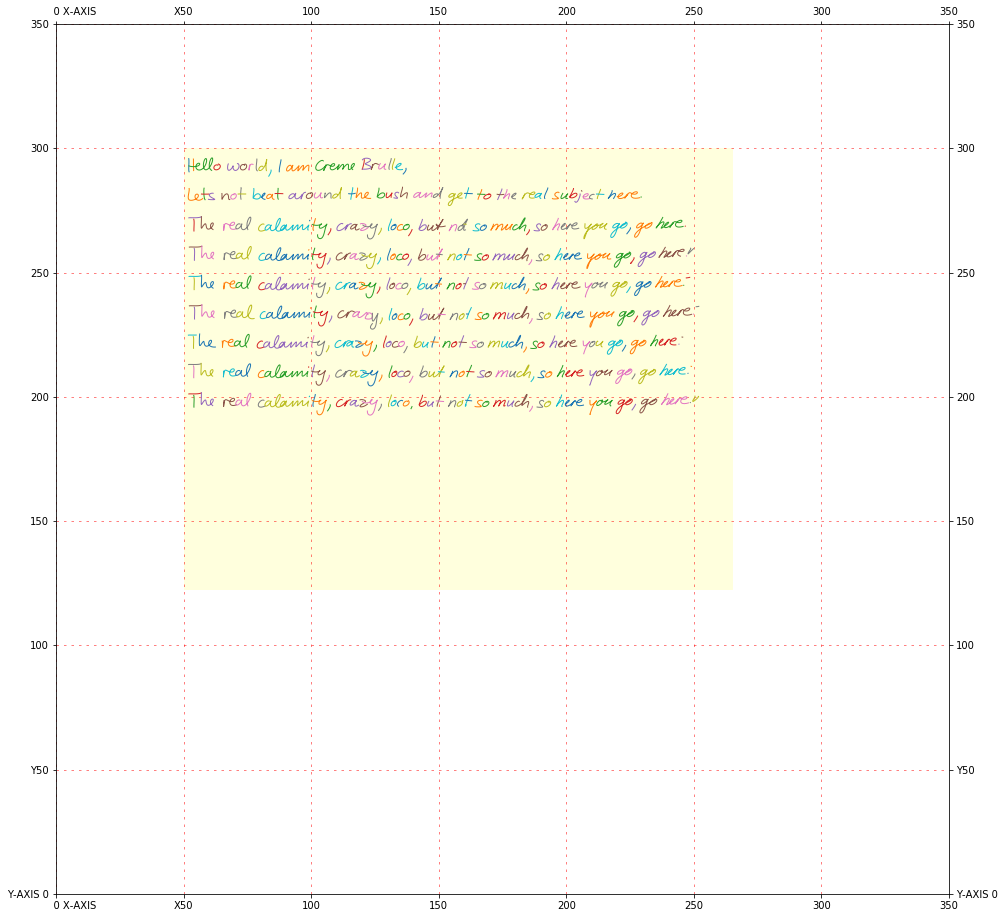

None

In [8]:
gcode_filename, gcode_file, glist = gcode.gen_gcode(filename, \
                                        x_zoom=0.75, y_zoom = 0.75, \
                                        x_offset=50, y_offset=50, \
                                        z_mat=0.3, z_lift=1)

for l in glist:
    x, y = np.asarray(l).T
    plt.plot(x,y, linewidth=1.0)
#     plt.plot(x,y, linewidth=1.0, color='blue')
    
def paper(plt, x=215,y=355,x0=50,y0=300): # LETTER 215x355
    plt.fill([x0,x0+x,x0+x,x0,x0],[y0,y0,y0-y,y0-y,y0], color='#ffffdd')
#     plt.plot([x0,x0+x,x0+x,x0,x0],[y0,y0,y0-y,y0-y,y0], linewidth=2.0, color='purple', linestyle='-', )

paper(plt, 215,355/2)
    
plt.xlim(0, 350)
plt.ylim(0, 350)
r = range(0, 350, 10)
# print(list(r))
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350], ['            0 X-AXIS', 'X50', 100, 150, 200, 250, 300, 350])
# plt.yticks(r, r)
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350], ['Y-AXIS 0', 'Y50', 100, 150, 200, 250, 300, 350])
plt.tick_params(axis='both', top=True, right=True, labeltop=True, labelright=True)

plt.rcParams['figure.figsize'] = [16, 16]
plt.grid(color = 'red', linestyle = (0, (5, 10)), linewidth = 0.5)
display(FileLink(gcode_filename))
display(plt.show())

In [4]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess

In [7]:
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print(sess.run(c))

[[22. 28.]
 [49. 64.]]
